# Importing libraries

In [97]:
import pandas as pd
import numpy as np
import random as rn
import matplotlib.pyplot as plt
from sklearn import datasets

# Importing the dataset

In [98]:
#importing the dataset
dataset = pd.read_csv("BR_mod.csv") 
#if you want to import data set from github then please unquote the below lines
#url='https://raw.githubusercontent.com/krrattos/Breast_cancer_ml/main/BR_mod.csv'
#data = pd.read_csv(url)

###Filling missing values with mean of column

In [99]:
from numpy import nan
dataset.fillna(dataset.mean(), inplace=True)
dataset

,patient.age_at_initial_pathologic_diagnosis,patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision,patient.axillary_lymph_node_stage_method_type,patient.breast_carcinoma_estrogen_receptor_status,patient.breast_carcinoma_progesterone_receptor_status,patient.breast_carcinoma_surgical_procedure_name,patient.gender,patient.histological_type,patient.history_of_neoadjuvant_treatment,patient.initial_pathologic_diagnosis_method,patient.lab_proc_her2_neu_immunohistochemistry_receptor_status,patient.lymph_node_examined_count,patient.margin_status,patient.menopause_status,patient.number_of_lymphnodes_positive_by_he,patient.other_dx,patient.person_neoplasm_cancer_status,patient.race_list.race,patient.stage_event.pathologic_stage,patient.stage_event.tnm_categories.pathologic_categories.pathologic_m,patient.stage_event.tnm_categories.pathologic_categories.pathologic_n,patient.stage_event.tnm_categories.pathologic_categories.pathologic_t,patient.tissue_prospective_collection_indicator,patient.tissue_source_site
0,55,0.4,3.000000,1.0,1.0,1.0,1,2.0,0.0,1.750751,0.0,13.0,0.0,3.000000,4.0,0.0,1.0,2.0,12.0,2,15,13,0.0,0
1,50,1.8,3.000000,1.0,1.0,0.0,1,1.0,0.0,0.000000,1.0,15.0,0.0,2.000000,1.0,0.0,0.0,1.0,6.0,0,5,5,0.0,0
2,62,1.0,2.104427,1.0,1.0,1.0,1,1.0,0.0,0.000000,0.0,23.0,0.0,2.000000,1.0,0.0,0.0,1.0,6.0,0,5,5,0.0,0
3,52,1.0,4.000000,1.0,1.0,3.0,1,1.0,0.0,0.000000,1.0,2.0,2.0,2.121152,0.0,0.0,0.0,1.0,2.0,0,2,4,0.0,0
4,50,0.0,0.000000,1.0,1.0,1.0,1,2.0,0.0,0.000000,1.0,14.0,0.0,2.000000,4.0,0.0,0.0,2.0,8.0,0,10,5,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,77,0.0,1.000000,1.0,1.0,0.0,1,2.0,0.0,0.000000,0.0,4.0,0.0,2.000000,0.0,0.0,0.0,2.0,2.0,2,1,4,0.0,37
1093,46,1.4,3.000000,1.0,1.0,1.0,1,2.0,0.0,0.000000,0.0,22.0,0.0,2.000000,5.0,0.0,0.0,2.0,8.0,2,10,4,0.0,38
1094,68,0.8,2.104427,1.0,1.0,3.0,1,2.0,0.0,0.000000,0.0,11.0,0.0,2.000000,0.0,0.0,0.0,2.0,6.0,2,0,8,0.0,38
1095,61,0.8,3.000000,1.0,1.0,2.0,1,2.0,0.0,0.000000,0.0,5.0,1.0,2.000000,3.0,1.0,0.0,2.0,8.0,2,5,8,0.0,39


# Normalizing the dataset

In [100]:
#normalising the dataset
data_norm = dataset.copy()

# apply normalization techniques
data_norm = (data_norm - data_norm.mean()) / data_norm.std()

# view normalized data
display(data_norm)

,patient.age_at_initial_pathologic_diagnosis,patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision,patient.axillary_lymph_node_stage_method_type,patient.breast_carcinoma_estrogen_receptor_status,patient.breast_carcinoma_progesterone_receptor_status,patient.breast_carcinoma_surgical_procedure_name,patient.gender,patient.histological_type,patient.history_of_neoadjuvant_treatment,patient.initial_pathologic_diagnosis_method,patient.lab_proc_her2_neu_immunohistochemistry_receptor_status,patient.lymph_node_examined_count,patient.margin_status,patient.menopause_status,patient.number_of_lymphnodes_positive_by_he,patient.other_dx,patient.person_neoplasm_cancer_status,patient.race_list.race,patient.stage_event.pathologic_stage,patient.stage_event.tnm_categories.pathologic_categories.pathologic_m,patient.stage_event.tnm_categories.pathologic_categories.pathologic_n,patient.stage_event.tnm_categories.pathologic_categories.pathologic_t,patient.tissue_prospective_collection_indicator,patient.tissue_source_site
0,-0.262026,-0.859567,5.807463e-01,0.557346,0.72191,-0.399345,0.105118,0.230871,-0.109561,1.937333e-16,-0.84272,0.285144,-0.334718,1.474762e+00,0.383973,-0.257192,3.245305,0.548140,2.522661,2.241188,2.675894,4.217121,-0.704678,-2.094394
1,-0.640339,1.462140,5.807463e-01,0.557346,0.72191,-1.377505,0.105118,-0.445693,-0.109561,-7.637627e-01,1.41518,0.527484,-0.334718,-2.033005e-01,-0.319599,-0.257192,-0.347447,-1.258557,0.126866,-0.448728,0.240640,-0.125692,-0.704678,-2.094394
2,0.267612,0.135451,1.727853e-15,0.557346,0.72191,-0.399345,0.105118,-0.445693,-0.109561,-7.637627e-01,-0.84272,1.496848,-0.334718,-2.033005e-01,-0.319599,-0.257192,-0.347447,-1.258557,0.126866,-0.448728,0.240640,-0.125692,-0.704678,-2.094394
3,-0.489014,0.135451,1.229210e+00,0.557346,0.72191,1.556975,0.105118,-0.445693,-0.109561,-7.637627e-01,1.41518,-1.047731,4.550739,4.471255e-15,-0.554123,-0.257192,-0.347447,-1.258557,-1.470330,-0.448728,-0.489937,-0.668544,-0.704678,-2.094394
4,-0.640339,-1.522911,-1.364643e+00,0.557346,0.72191,-0.399345,0.105118,0.230871,-0.109561,-7.637627e-01,1.41518,0.406314,-0.334718,-2.033005e-01,0.383973,-0.257192,-0.347447,0.548140,0.925465,-0.448728,1.458267,-0.125692,1.422983,-1.937800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,1.402552,-1.522911,-7.161802e-01,0.557346,0.72191,-1.377505,0.105118,0.230871,-0.109561,-7.637627e-01,-0.84272,-0.805390,-0.334718,-2.033005e-01,-0.554123,-0.257192,-0.347447,0.548140,-1.470330,2.241188,-0.733462,-0.668544,-0.704678,3.699592
1093,-0.942989,0.798795,5.807463e-01,0.557346,0.72191,-0.399345,0.105118,0.230871,-0.109561,-7.637627e-01,-0.84272,1.375678,-0.334718,-2.033005e-01,0.618497,-0.257192,-0.347447,0.548140,0.925465,2.241188,1.458267,-0.668544,-0.704678,3.856186
1094,0.721588,-0.196222,1.727853e-15,0.557346,0.72191,1.556975,0.105118,0.230871,-0.109561,-7.637627e-01,-0.84272,0.042803,-0.334718,-2.033005e-01,-0.554123,-0.257192,-0.347447,0.548140,0.126866,2.241188,-0.976988,1.502863,-0.704678,3.856186
1095,0.191950,-0.196222,5.807463e-01,0.557346,0.72191,0.578815,0.105118,0.230871,-0.109561,-7.637627e-01,-0.84272,-0.684220,2.108010,-2.033005e-01,0.149449,3.888142,-0.347447,0.548140,0.925465,2.241188,0.240640,1.502863,-0.704678,4.012780


Converting data frame to type array for easy numpy manipulation

In [101]:
matrix=np.array(data_norm.T)
matrix

array([[-2.62025729e-01, -6.40338740e-01,  2.67612485e-01, ...,
         7.21588097e-01,  1.91949883e-01, -9.42989148e-01],
       [-8.59566557e-01,  1.46213995e+00,  1.35450516e-01, ...,
        -1.96221842e-01, -1.96221842e-01, -1.96221842e-01],
       [ 5.80746289e-01,  5.80746289e-01,  1.72785312e-15, ...,
         1.72785312e-15,  5.80746289e-01,  5.80746289e-01],
       ...,
       [ 4.21712110e+00, -1.25692180e-01, -1.25692180e-01, ...,
         1.50286280e+00,  1.50286280e+00, -6.68543841e-01],
       [-7.04678130e-01, -7.04678130e-01, -7.04678130e-01, ...,
        -7.04678130e-01, -7.04678130e-01, -7.04678130e-01],
       [-2.09439418e+00, -2.09439418e+00, -2.09439418e+00, ...,
         3.85618623e+00,  4.01278045e+00,  4.01278045e+00]])

In [102]:
# matrix.to_numpy()
# print (matrix)

# K medoid algo starts here

Below is code to count distance between two points

In [103]:
def dist_mat(numof_k):
    distance_matrix_old= np.zeros((matrix.shape[0],numof_k))
    k = np.random.randint(matrix.shape[0], size=numof_k)
    for i in range(len(k)):
        for j in range(matrix.shape[0]):
            distance_matrix_old[j,i] = np.sum(abs(matrix[j,0:]-matrix[k[i],:]))
    return(distance_matrix_old)

Original distance matrix:

In [104]:
x=dist_mat(2)
x

array([[   0.        , 1231.85287876],
       [1244.33038437, 1271.79737435],
       [1267.86474584, 1463.11422104],
       [1189.42963405, 1430.31488213],
       [1231.33027572, 1396.57794135],
       [1274.49382443, 1329.62174223],
       [1011.43113165, 1171.80636827],
       [1126.28008742, 1037.40924065],
       [1003.80792312, 1098.17799502],
       [1250.53604323, 1085.92422434],
       [1256.89695407, 1158.37437964],
       [1294.36607204, 1316.29468895],
       [1147.01814482, 1177.32634884],
       [1407.55856237, 1273.16297648],
       [1143.74319948, 1090.05661981],
       [1088.26266975, 1114.33331811],
       [1160.33715445, 1214.91318916],
       [1171.3016154 , 1442.62524789],
       [1259.74232399, 1266.19996466],
       [1148.87943134, 1017.63018921],
       [1269.78562831, 1211.44081825],
       [1188.72028939, 1148.38477061],
       [1231.85287876,    0.        ],
       [1266.936546  , 1126.35749381]])

In [105]:
def clusters(dist_mat):
    minimum=[]
    clust=[]
    for i in range(dist_mat.shape[1]):
         clust.append([])
    for i in range(dist_mat.shape[0]):
        for j in range(dist_mat.shape[1]):
            if min(dist_mat[i])==dist_mat[i,j]:
                minimum.append(min(dist_mat[i]))
                clust[j].append(dist_mat[i])
    return(clust,minimum)

In [106]:
old_min_value=clusters(x)[1]

In [107]:
def kmedoids(numof_k,n):
    distance_matrix_new= np.zeros((matrix.shape[0],numof_k))
    k = np.random.randint(matrix.shape[0], size=numof_k)
    list2=[i for i in range(matrix.shape[0]) if i not in k]
    for iteration in range(n):
        for i in range(len(k)):
            for j in range(len(list2)):
                k[i]=list2[j]
                for k_val in range(len(k)):
                    for value in range(24):
                        distance_matrix_new[value,k_val] = np.sum(abs(matrix[value,0:]-matrix[k[k_val],:]))
                        new_min_value=clusters(distance_matrix_new)[1]
                        if sum(new_min_value)- sum(old_min_value)<0:
                            cluster=clusters(distance_matrix_new)[0]
                        else:
                            cluster=clusters(x)[0]
    return(cluster)

# Our final cluster matrix:

In [108]:
cluster=kmedoids(2,1)
cluster

[[array([   0.        , 1231.85287876]),
  array([1244.33038437, 1271.79737435]),
  array([1267.86474584, 1463.11422104]),
  array([1189.42963405, 1430.31488213]),
  array([1231.33027572, 1396.57794135]),
  array([1274.49382443, 1329.62174223]),
  array([1011.43113165, 1171.80636827]),
  array([1003.80792312, 1098.17799502]),
  array([1294.36607204, 1316.29468895]),
  array([1147.01814482, 1177.32634884]),
  array([1088.26266975, 1114.33331811]),
  array([1160.33715445, 1214.91318916]),
  array([1171.3016154 , 1442.62524789]),
  array([1259.74232399, 1266.19996466])],
 [array([1126.28008742, 1037.40924065]),
  array([1250.53604323, 1085.92422434]),
  array([1256.89695407, 1158.37437964]),
  array([1407.55856237, 1273.16297648]),
  array([1143.74319948, 1090.05661981]),
  array([1148.87943134, 1017.63018921]),
  array([1269.78562831, 1211.44081825]),
  array([1188.72028939, 1148.38477061]),
  array([1231.85287876,    0.        ]),
  array([1266.936546  , 1126.35749381])]]

Plotting our cluster:

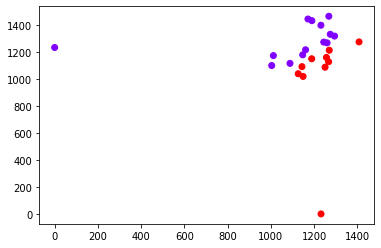

In [109]:
x=[]
y=[]
cl=[]

for i in range(len(cluster)):
  for j in range(len(cluster[i])):
    x.append(cluster[i][j][0])
    y.append(cluster[i][j][1])
    cl.append(i+1)
plt.scatter(x,y,c=cl,cmap='rainbow')

I tried plotting cluster using PCA by reducing the dimensions below:

In [110]:
# from sklearn.datasets import load_digits
# from sklearn.decomposition import PCA
# import numpy as np
 
# pca = PCA(2)
 
# df = pca.fit_transform(data_norm)
 
# df.shape

In [111]:
# import matplotlib.pyplot as plt

# plt.scatter(df[:,0] , df[:,1])
# plt.show()